# <font color='Red'>Diabetes  Prediction ML Model
### Name :         Riyas Shahul
### Organization : Entri Elevate
### Date :         29/07/2024

# <font color='Red'> Table of Contents 

1. Overview of Problem Statement
2. Objective
3. Data Collection
4. Data Description
5. Exploratory Data Analysis (EDA)
6. Data Preprocessing
7. Visualization
8. Feature Engineering
9. Data Splitting
10. Model Selection
11. Model Training & Evaluation
12. Feature Selection
13. Model Evaluation
14. Hyperparameter Tuning
15. Results
16. Model Deployment
17. Limitations
18. Conclusion
19. Future Work

## <font color='Red'> 1. Overview of Problem Statement

#### Problem Context and Relevance


Diabetes is a chronic health condition that affects how the body processes blood sugar (glucose). Managing and predicting diabetes risk is crucial for improving patient outcomes and reducing healthcare costs. Early detection of diabetes can lead to better management strategies, potentially delaying or preventing the onset of complications.

## <font color='Red'> 2. Objective

The primary objective of this analysis is to build a predictive model that can accurately classify individuals as diabetic or non-diabetic based on various health-related features present in the dataset. This predictive model can aid healthcare professionals in identifying at-risk individuals, allowing for timely intervention and management.

#### Problem Statement

Predicting the likelihood of diabetes in individuals based on a range of health indicators and lifestyle factors 

In [4]:
#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

## <font color='Red'> 3. Data Collection 

In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

using Tab after anything give searchable things example (import then click Tab for libraries search easy to find panda,numpy etc..)

In [6]:
df = pd.read_csv("D:\Jupyter Notebook\Entri Main Project\diabetes_data.csv\diabetes_data.csv")
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


## <font color='Red'> 4. Data Description

1. **Age** : 13-level age category
1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 /
6 = 45-49 / 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 /
11 = 70-74 / 12 = 75-79 / 13 = 80 or older

|1|2|3|4|5|6|7|8|9|10|11|12|13|
|----|----|----|----|----|----|----|----|----|----|----|----|----|
|18-24|25-29|30-34|35-39|40-44|45-49|50-54|55-59|60-64|65-69|70-74|75-79|80 or old|

2. **Sex** : patient's gender
0 = female
1 = male

3. **HighChol** :
0 = no high cholesterol
1 = high cholesterol

4. **CholCheck** :
0 = no cholesterol check in 5 years
1 = yes cholesterol check in 5 years

5. **BMI** : Body Mass Index
 
6. **Smoker** : Have you smoked at least 100 cigarettes in your entire life?
[Note: 5 packs = 100 cigarettes]
0 = no
1 = yes

7. **HeartDiseaseorAttack** : coronary heart disease (CHD) or myocardial infarction (MI)
0 = no
1 = yes

8. **PhysActivity** : physical activity in past 30 days - not including job
0 = no
1 = yes

9. **Fruits** : Consume Fruit 1 or more times per day
0 = no
1 = yes

10. **Veggies** : Consume Vegetables 1 or more times per day
0 = no
1 = yes

11. **HvyAlcoholConsump** : adult men >=14 drinks per week; adult women>=7 drinks pe
0 = no
1 = yes

12. **GenHlth** : Would you say that in general your health is: scale 1-5
1 = excellent
2 = very good
3 = good
4 = fair
5 = poor

13. **MentHlth** : days of poor mental health scale 1-30 days
1 = excellent
...
30 = poor

14. **PhysHlth** : physical illness or injury days in past 30 days scale 1-30
1 = excellent
...
30 = poor

15. **DiffWalk** : Do you have serious difficulty walking or climbing stairs?
0 = no
1 = yes

16. **Stroke** : you ever had a stroke.
0 = no
1 = yes

17. **HighBP** : BP : Blood Pressure
0 = no high BP
1 = high BP

18. **Diabetes** :
0 = no diabetes
1 = diabetes

**Dataset Size**  
Number of records The total number of records in the dataset s 70692, Number of features: 18

Data set From Kaggle   
[Dataset](https://www.kaggle.com/datasets/prosperchuks/health-dataset/data)

## <font color='Red'> 5. EDA (Exploratory Data Analysis)

### Shape of Dataset ###

In [7]:
df.shape

(70692, 18)

There are 70692 Rows and 18 Columns in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

From the above information we can observe that

All the columns are numerical in nature, therefore no data type conversion is required to build the model. none of the columns consist of null values. As we know that the dataset consists of 70692 entries and each column has 70692 non null values associated to it , and all Colums are **Float datatype**

In [9]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.tail()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0
70691,9.0,0.0,1.0,1.0,25.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0


In [11]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

## Checking of null values ##

In [12]:
# Finding missing values
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [13]:
# percentage of missing values
df.isnull().sum()/df.shape[0]*100

Age                     0.0
Sex                     0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Stroke                  0.0
HighBP                  0.0
Diabetes                0.0
dtype: float64

If  percentage of missing values is greater than 50 % , We can drop that values 
As for here there is no missing values here

## Checking for Duplicates 

In [14]:
#Finding Duplicates
df.duplicated().sum()

6672

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
70687    False
70688    False
70689    False
70690    False
70691    False
Length: 70692, dtype: bool

In [18]:
df.shape

(64020, 18)

After removing the duplicates the rows reduced from 70692  to 64020

In [19]:
df.nunique()

Age                     13
Sex                      2
HighChol                 2
CholCheck                2
BMI                     80
Smoker                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Stroke                   2
HighBP                   2
Diabetes                 2
dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64020.0,8.607420,2.860717,1.0,7.0,9.0,11.0,13.0
Sex,64020.0,0.455983,0.498063,0.0,0.0,0.0,1.0,1.0
HighChol,64020.0,0.539550,0.498437,0.0,0.0,1.0,1.0,1.0
CholCheck,64020.0,0.973211,0.161466,0.0,1.0,1.0,1.0,1.0
BMI,64020.0,30.178554,7.287730,12.0,25.0,29.0,34.0,98.0
Smoker,64020.0,0.490706,0.499918,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,64020.0,0.159950,0.366563,0.0,0.0,0.0,0.0,1.0
PhysActivity,64020.0,0.678366,0.467107,0.0,0.0,1.0,1.0,1.0
Fruits,64020.0,0.590862,0.491679,0.0,0.0,1.0,1.0,1.0
Veggies,64020.0,0.771587,0.419813,0.0,1.0,1.0,1.0,1.0


**Age**: The average age is approximately 8.6 years, with a standard deviation of 2.86. The ages range from 1 to 13 years.

**Sex**: The dataset is nearly balanced, with males making up about 45.6%.

**HighChol**: About 53.9% of the individuals have high cholesterol.

**CholCheck**: Almost all individuals (97.3%) have had a cholesterol check in the past five years.

**BMI**: The average BMI is around 30.18, with a wide range from 12 to 98.

**Smoker:** About 49.1% of the individuals are smokers.

**HeartDiseaseorAttack**: Approximately 16% have had a heart disease or attack.

**PhysActivity**: About 67.8% engage in physical activity.

**Fruits**: Around 59.1% consume fruits.

**Veggies**: A high percentage (77.2%) consume vegetables.

**HvyAlcoholConsump**: Only 4.6% are heavy alcohol consumers.

**GenHlth**: The general health rating averages at 2.92 on a scale of 1 to 5.

**MentHlth**: The average number of days of poor mental health is about 4.13 days per month.

**PhysHlth**: The average number of days of poor physical health is approximately 6.39 days per month.

**DiffWalk**: About 27.7% have difficulty walking.

**Stroke**: 6.9% have had a stroke.

**HighBP**: Approximately 58.2% have high blood pressure.

**Diabetes**: 52.2% of the individuals have diabetes.

### Identify Numerical and Categorical columns ###

In [21]:
#Numerical Columns

num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [22]:
# Categorical columns

cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index([], dtype='object')

Out of 18 colums there is no Categorcal Column

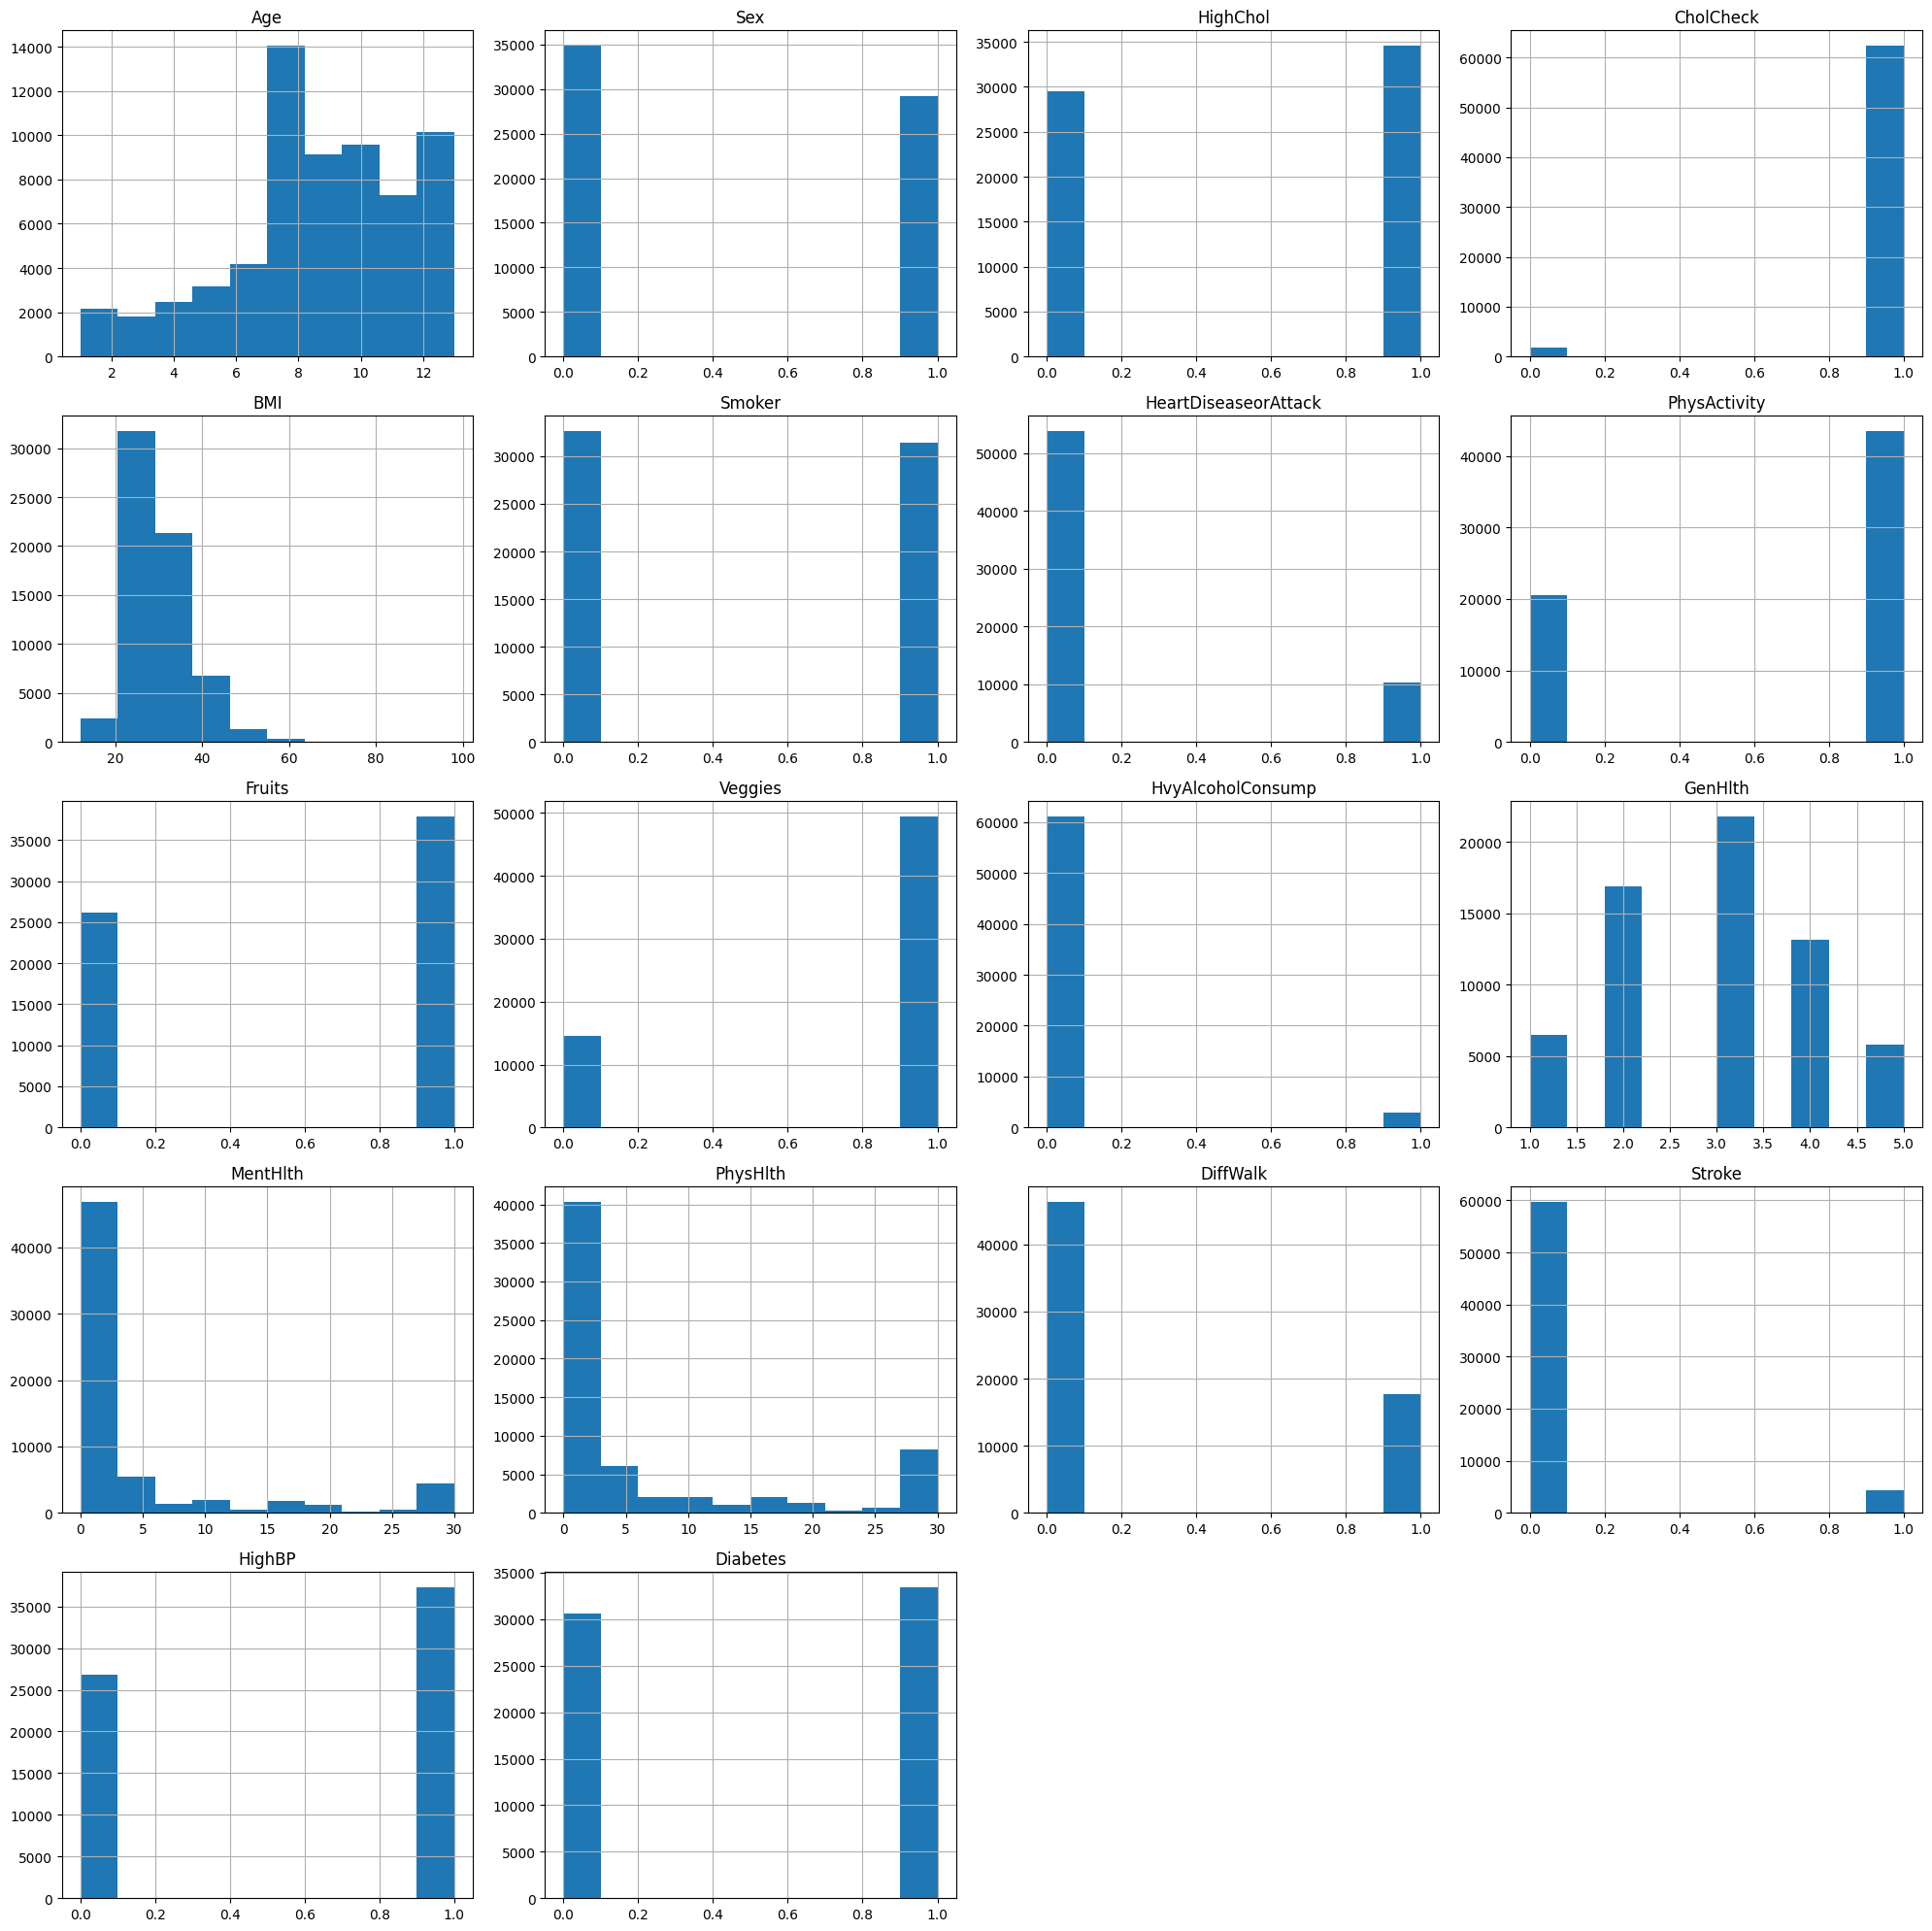

In [23]:
#Histograms 
df.hist (figsize=(20,20))

plt.tight_layout()
plt.show()

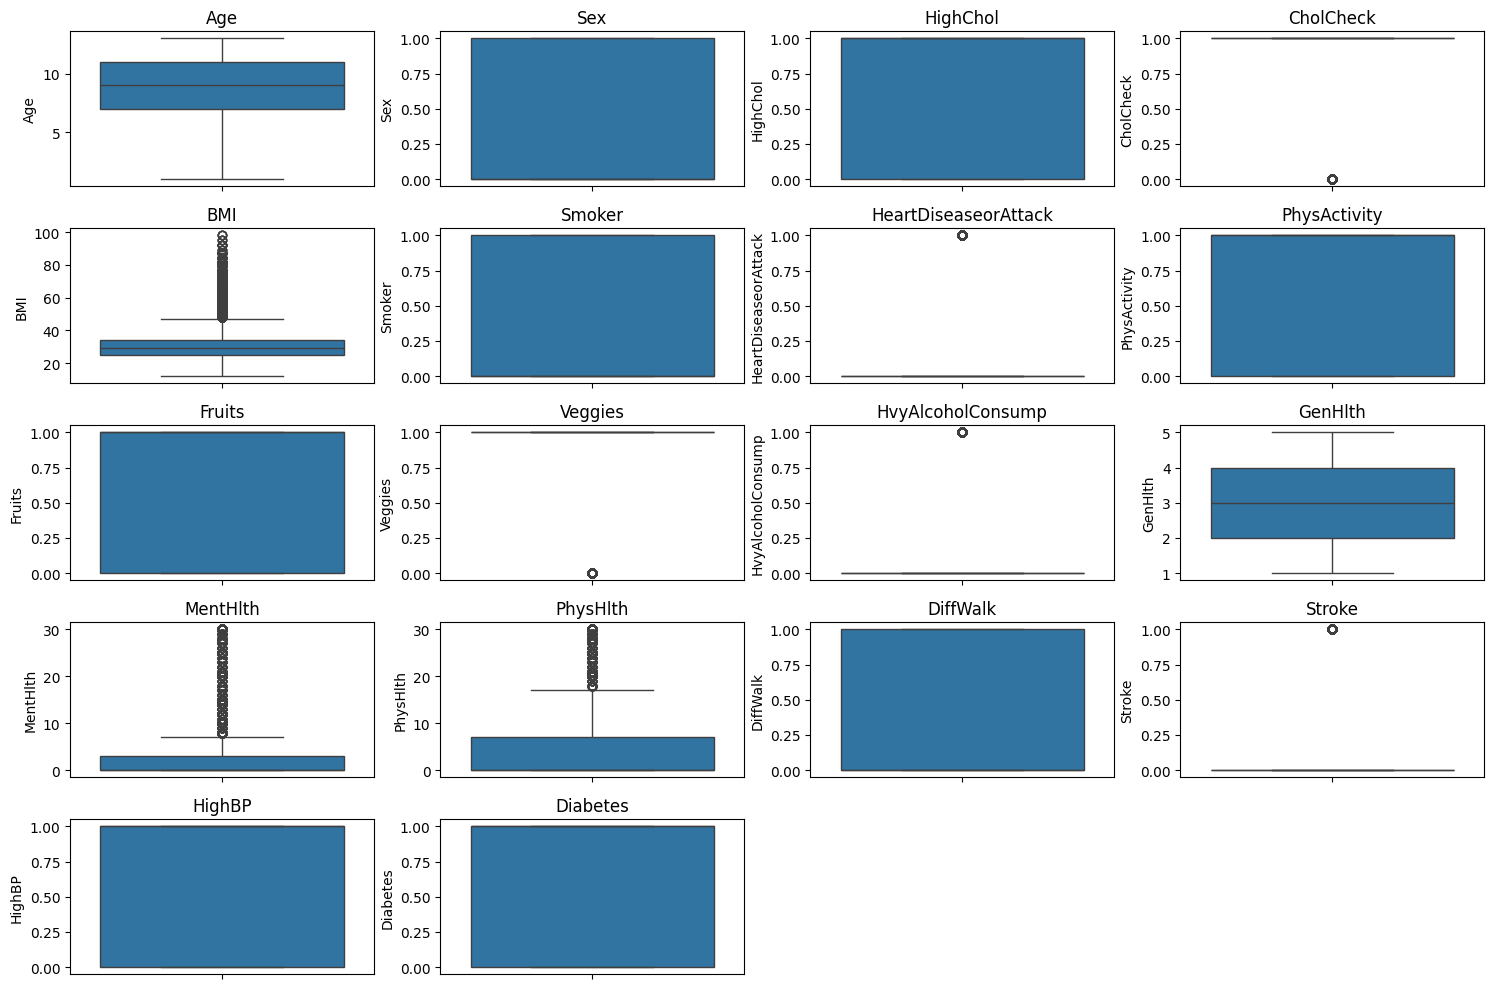

In [24]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(df):
 plt.subplot(5, 4, i+1)
 sns.boxplot(y=df[col])
 plt.title(col)
plt.tight_layout()
plt.show()

<Axes: xlabel='Diabetes', ylabel='count'>

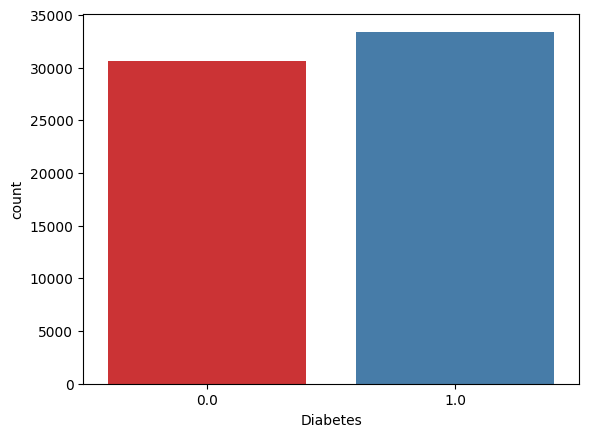

In [25]:
sns.countplot(data= df, x="Diabetes",palette="Set1")

In [26]:
#target variable analysis
df["Diabetes"].value_counts()

Diabetes
1.0    33398
0.0    30622
Name: count, dtype: int64

Here we can see where **Diabetes patient is 33398 as 1.0 values** and 
**non Diabetes patient is 30622 as 0.0 values**

In [27]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = df.apply(skew)
kurt = df.apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)


Age                    -0.545099
Sex                     0.176756
HighChol               -0.158698
CholCheck              -5.861482
BMI                     1.669563
Smoker                  0.037182
HeartDiseaseorAttack    1.855359
PhysActivity           -0.763712
Fruits                 -0.369603
Veggies                -1.293857
HvyAlcoholConsump       4.315779
GenHlth                 0.108851
MentHlth                2.224254
PhysHlth                1.512984
DiffWalk                0.996571
Stroke                  3.416137
HighBP                 -0.331484
Diabetes               -0.086805
dtype: float64
Age                      2.783980
Sex                      1.031243
HighChol                 1.025185
CholCheck               35.356972
BMI                      9.829732
Smoker                   1.001383
HeartDiseaseorAttack     4.442358
PhysActivity             1.583256
Fruits                   1.136606
Veggies                  2.674065
HvyAlcoholConsump       19.625948
GenHlth          

### -Skewness
**Positively Skewed Variables** (skew > 1):
BMI, HeartDiseaseorAttack, HvyAlcoholConsump, MentHlth, PhysHlth, Stroke

**Negatively Skewed Variables** (skew < -1):
CholCheck, Veggies

### -Kurtosis
**Platykurtic Distribution** (kurtosis < 3):
Age, Sex, HighChol, Smoker, PhysActivity, Fruits, Veggies, GenHlth, DiffWalk, HighBP, Diabetes

**Leptokurtic Distribution** (kurtosis > 3):
CholCheck, BMI, HeartDiseaseorAttack, HvyAlcoholConsump, MentHlth, PhysHlth, Stroke

This indicates that certain variables like **BMI** and **HvyAlcoholConsump** have a longer tail on the right, while **CholCheck** and **Veggies** are negatively skewed. Leptokurtic variables show heavier tails compared to a normal distribution, indicating more outliers.

## Correlation ##

Text(0.5, 1.0, 'Correlation Matrix - Heatmap')

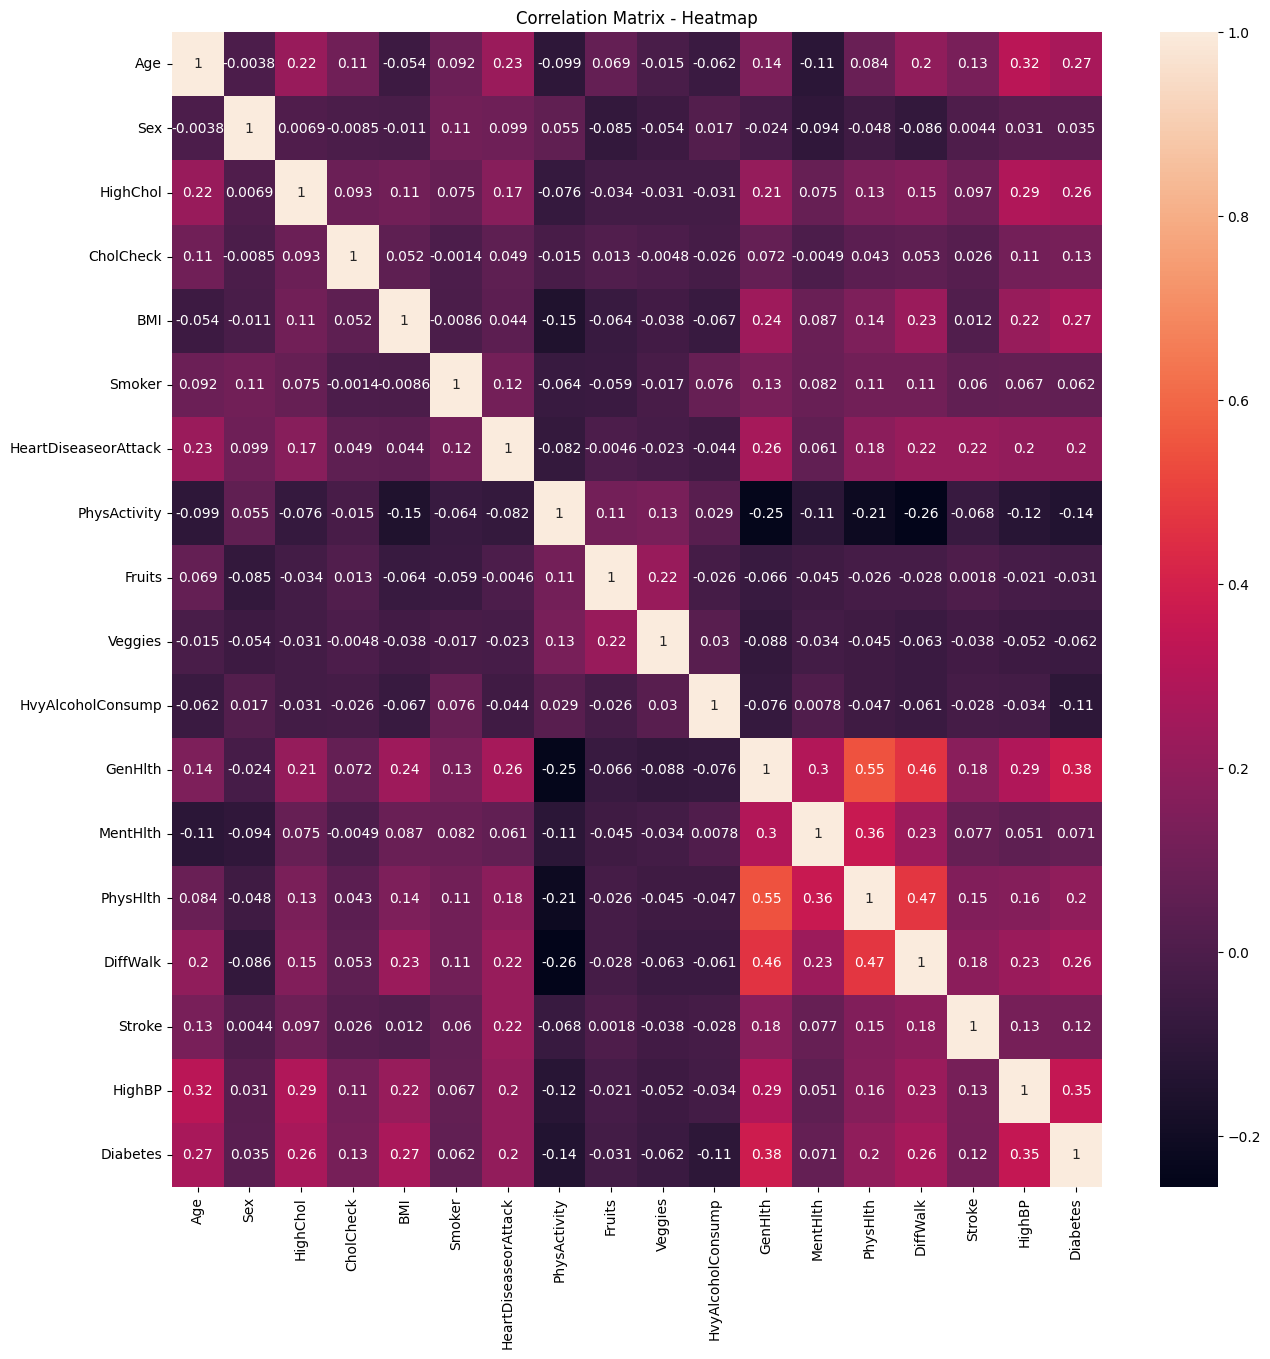

In [28]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True,)
plt.title('Correlation Matrix - Heatmap')

## <font color='Red'> 6. Data Preprocessing 

In [29]:
df1=df.copy()
df1.shape

(64020, 18)

### Remove unnecessary columns

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64020 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   64020 non-null  float64
 1   Sex                   64020 non-null  float64
 2   HighChol              64020 non-null  float64
 3   CholCheck             64020 non-null  float64
 4   BMI                   64020 non-null  float64
 5   Smoker                64020 non-null  float64
 6   HeartDiseaseorAttack  64020 non-null  float64
 7   PhysActivity          64020 non-null  float64
 8   Fruits                64020 non-null  float64
 9   Veggies               64020 non-null  float64
 10  HvyAlcoholConsump     64020 non-null  float64
 11  GenHlth               64020 non-null  float64
 12  MentHlth              64020 non-null  float64
 13  PhysHlth              64020 non-null  float64
 14  DiffWalk              64020 non-null  float64
 15  Stroke                64

In [31]:
df1

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [32]:
# Drop both 'CholCheck and 'MentHlth' columns cause they are no related diabetes
df1.drop(columns=['CholCheck','MentHlth','HeartDiseaseorAttack','Fruits','Veggies'], inplace=True)

## Handling missing values  ##

In [33]:
df1 = df1.drop_duplicates()
df1

,Age,Sex,HighChol,BMI,Smoker,PhysActivity,HvyAlcoholConsump,GenHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,1.0,0.0,3.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70686,11.0,1.0,1.0,27.0,0.0,1.0,0.0,4.0,30.0,0.0,0.0,0.0,1.0
70687,6.0,0.0,1.0,37.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,29.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,25.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0


In [34]:
df1.isnull().sum()

Age                  0
Sex                  0
HighChol             0
BMI                  0
Smoker               0
PhysActivity         0
HvyAlcoholConsump    0
GenHlth              0
PhysHlth             0
DiffWalk             0
Stroke               0
HighBP               0
Diabetes             0
dtype: int64

In [35]:
df1.nunique()

Age                  13
Sex                   2
HighChol              2
BMI                  80
Smoker                2
PhysActivity          2
HvyAlcoholConsump     2
GenHlth               5
PhysHlth             31
DiffWalk              2
Stroke                2
HighBP                2
Diabetes              2
dtype: int64

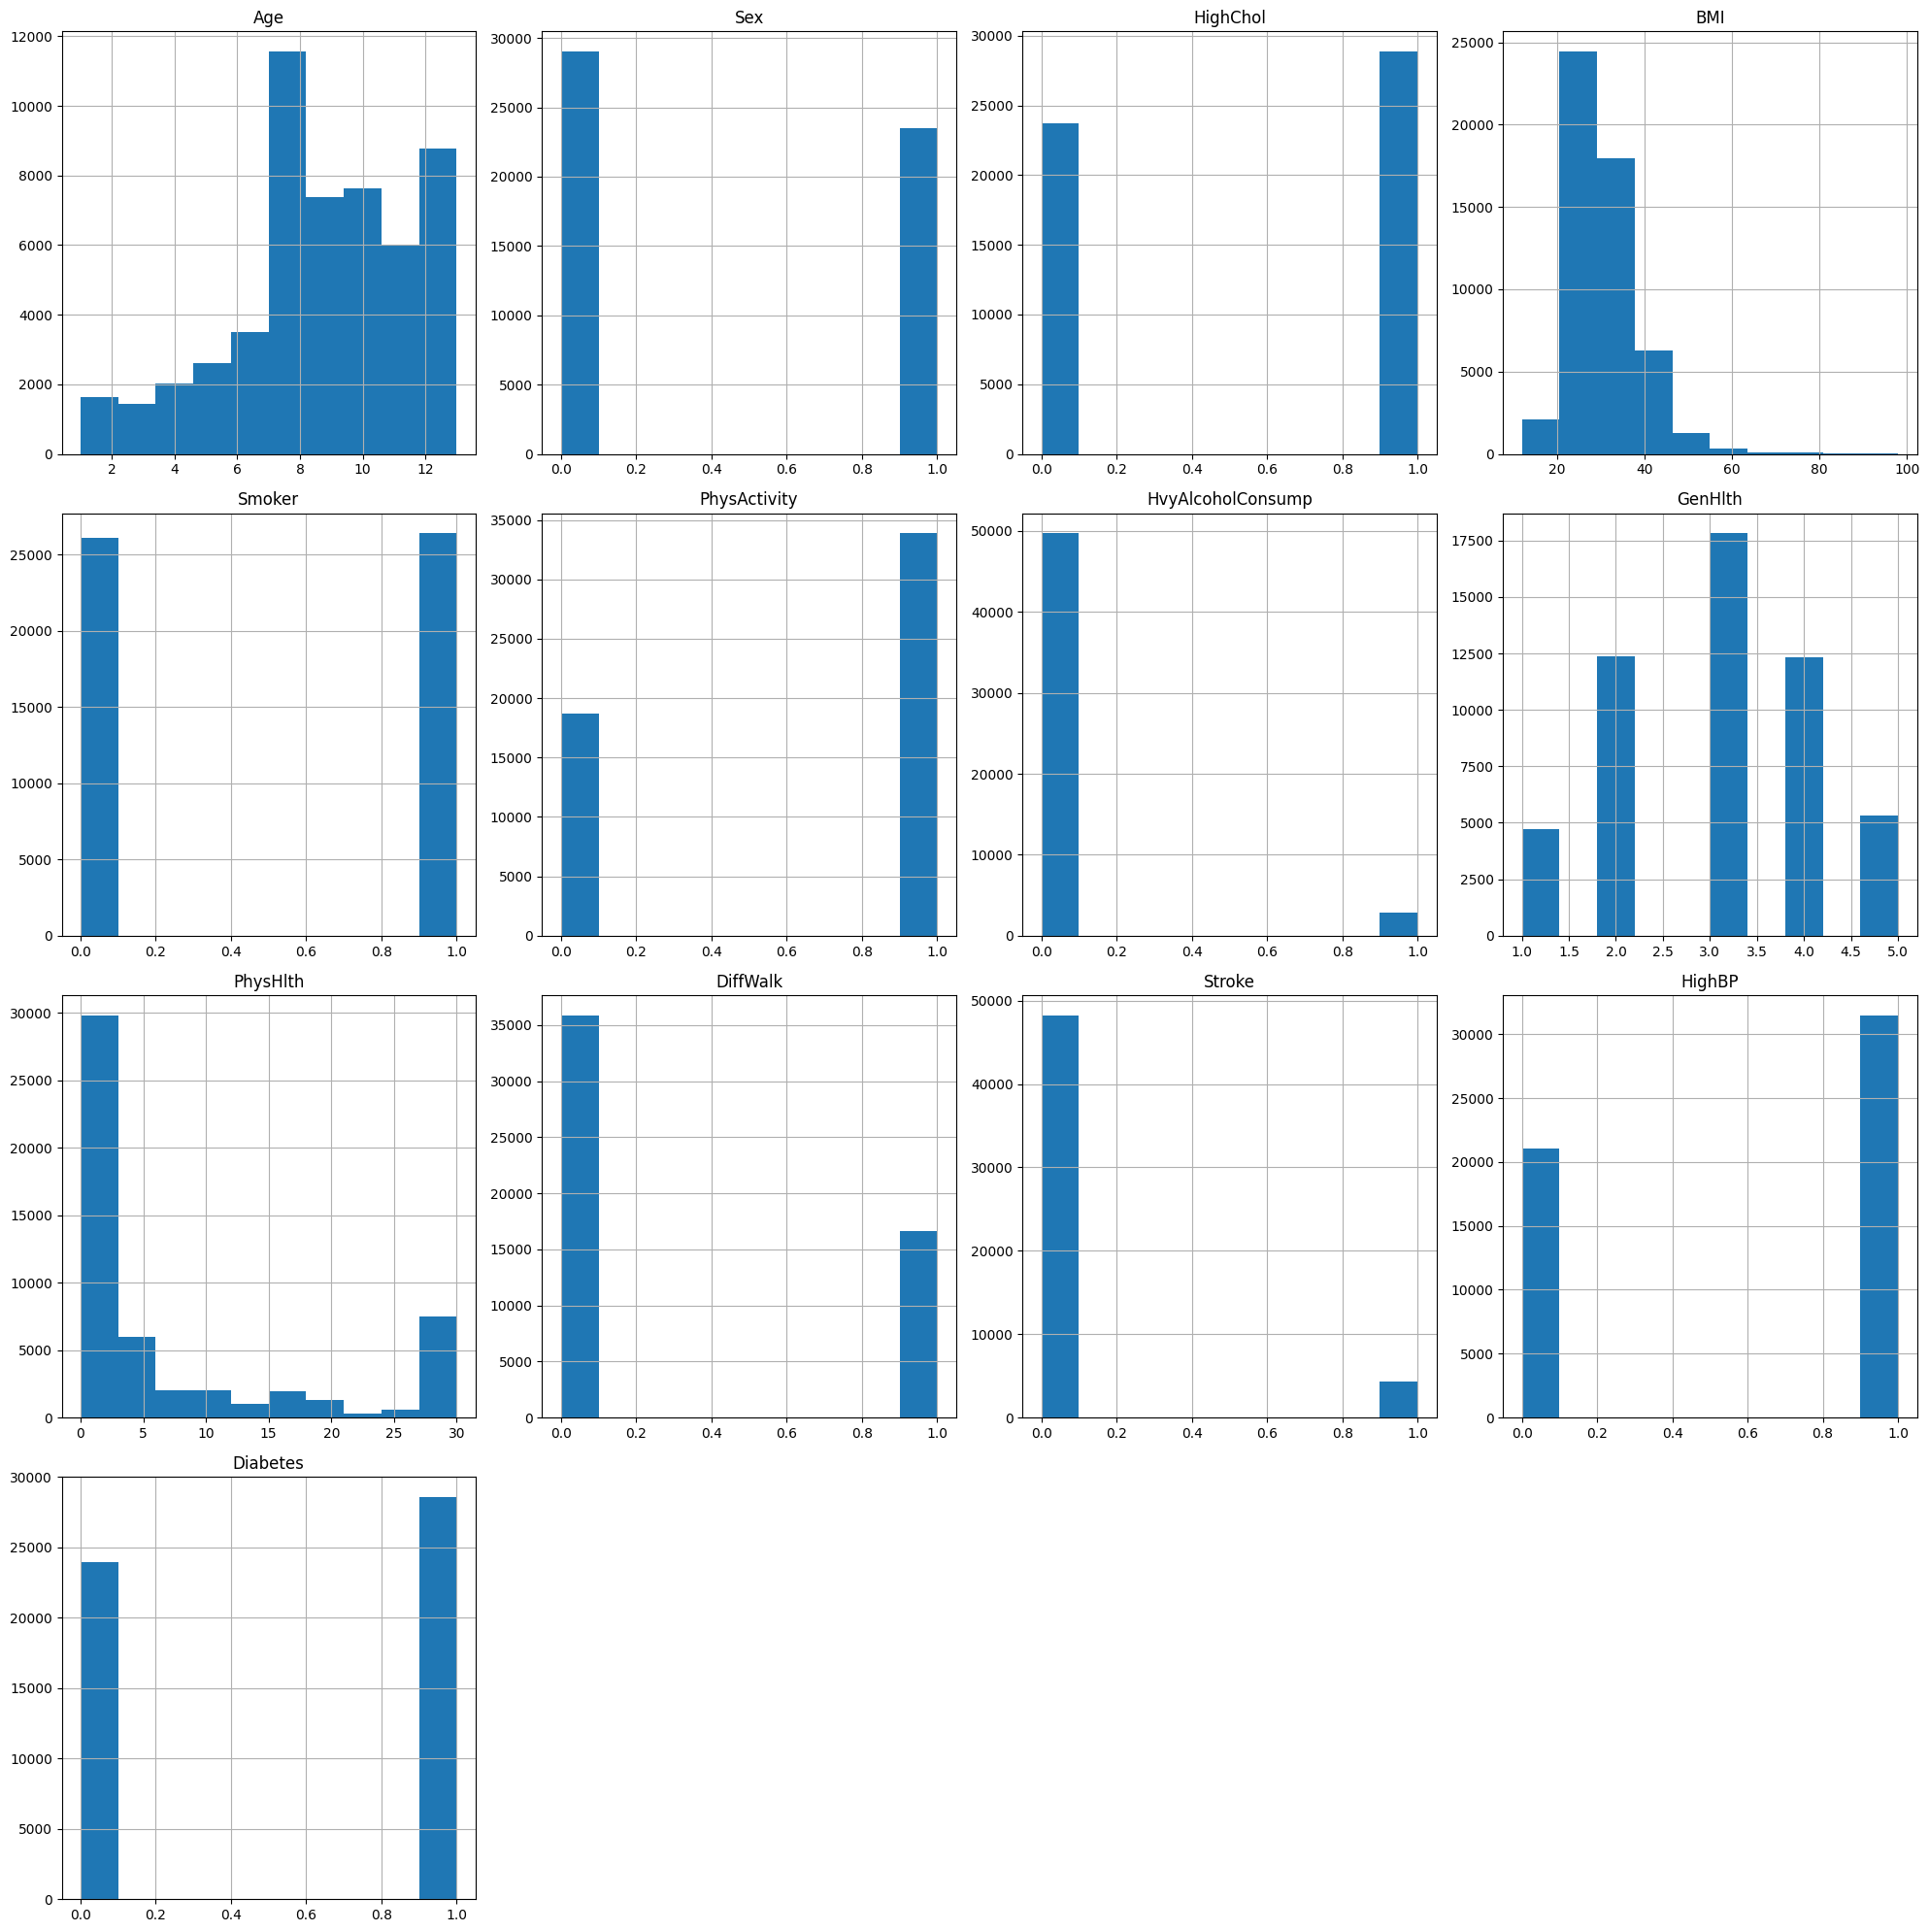

In [36]:
#Histograms 
df1.hist (figsize=(20,20))

plt.tight_layout()
plt.show()

In [37]:
#dropping HvyAlcoholConsump and Stroke for having a small  categories
df1.drop(columns=['HvyAlcoholConsump','Stroke'],inplace=True)

In [38]:
for feature in df1:
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lw = Q1 - 1.5 * IQR
    uw = Q3 + 1.5 * IQR

    # Check if any values in the feature are outside the bounds
    if df1[(df1[feature] < lw) | (df1[feature] > uw)].any(axis=None):
        print(feature, "yes")  # Feature has outliers
    else:
        print(feature, "no")  # Feature has no outliers

Age no
Sex no
HighChol no
BMI yes
Smoker no
PhysActivity no
GenHlth no
PhysHlth yes
DiffWalk no
HighBP no
Diabetes no


In [39]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    return lw,uw

In [40]:
lw, uw = whisker(df1['GenHlth'])
print(f'Lower whisker: {lw}, Upper whisker:{uw}')

Lower whisker: -1.0, Upper whisker:7.0


In [41]:
for i in df1.select_dtypes(include="number").columns:
 lw,uw=whisker(df1[i])
 df1[i]=np.where(df1[i]<lw,lw,df1[i])
 df1[i]=np.where(df1[i]>uw,uw,df1[i])

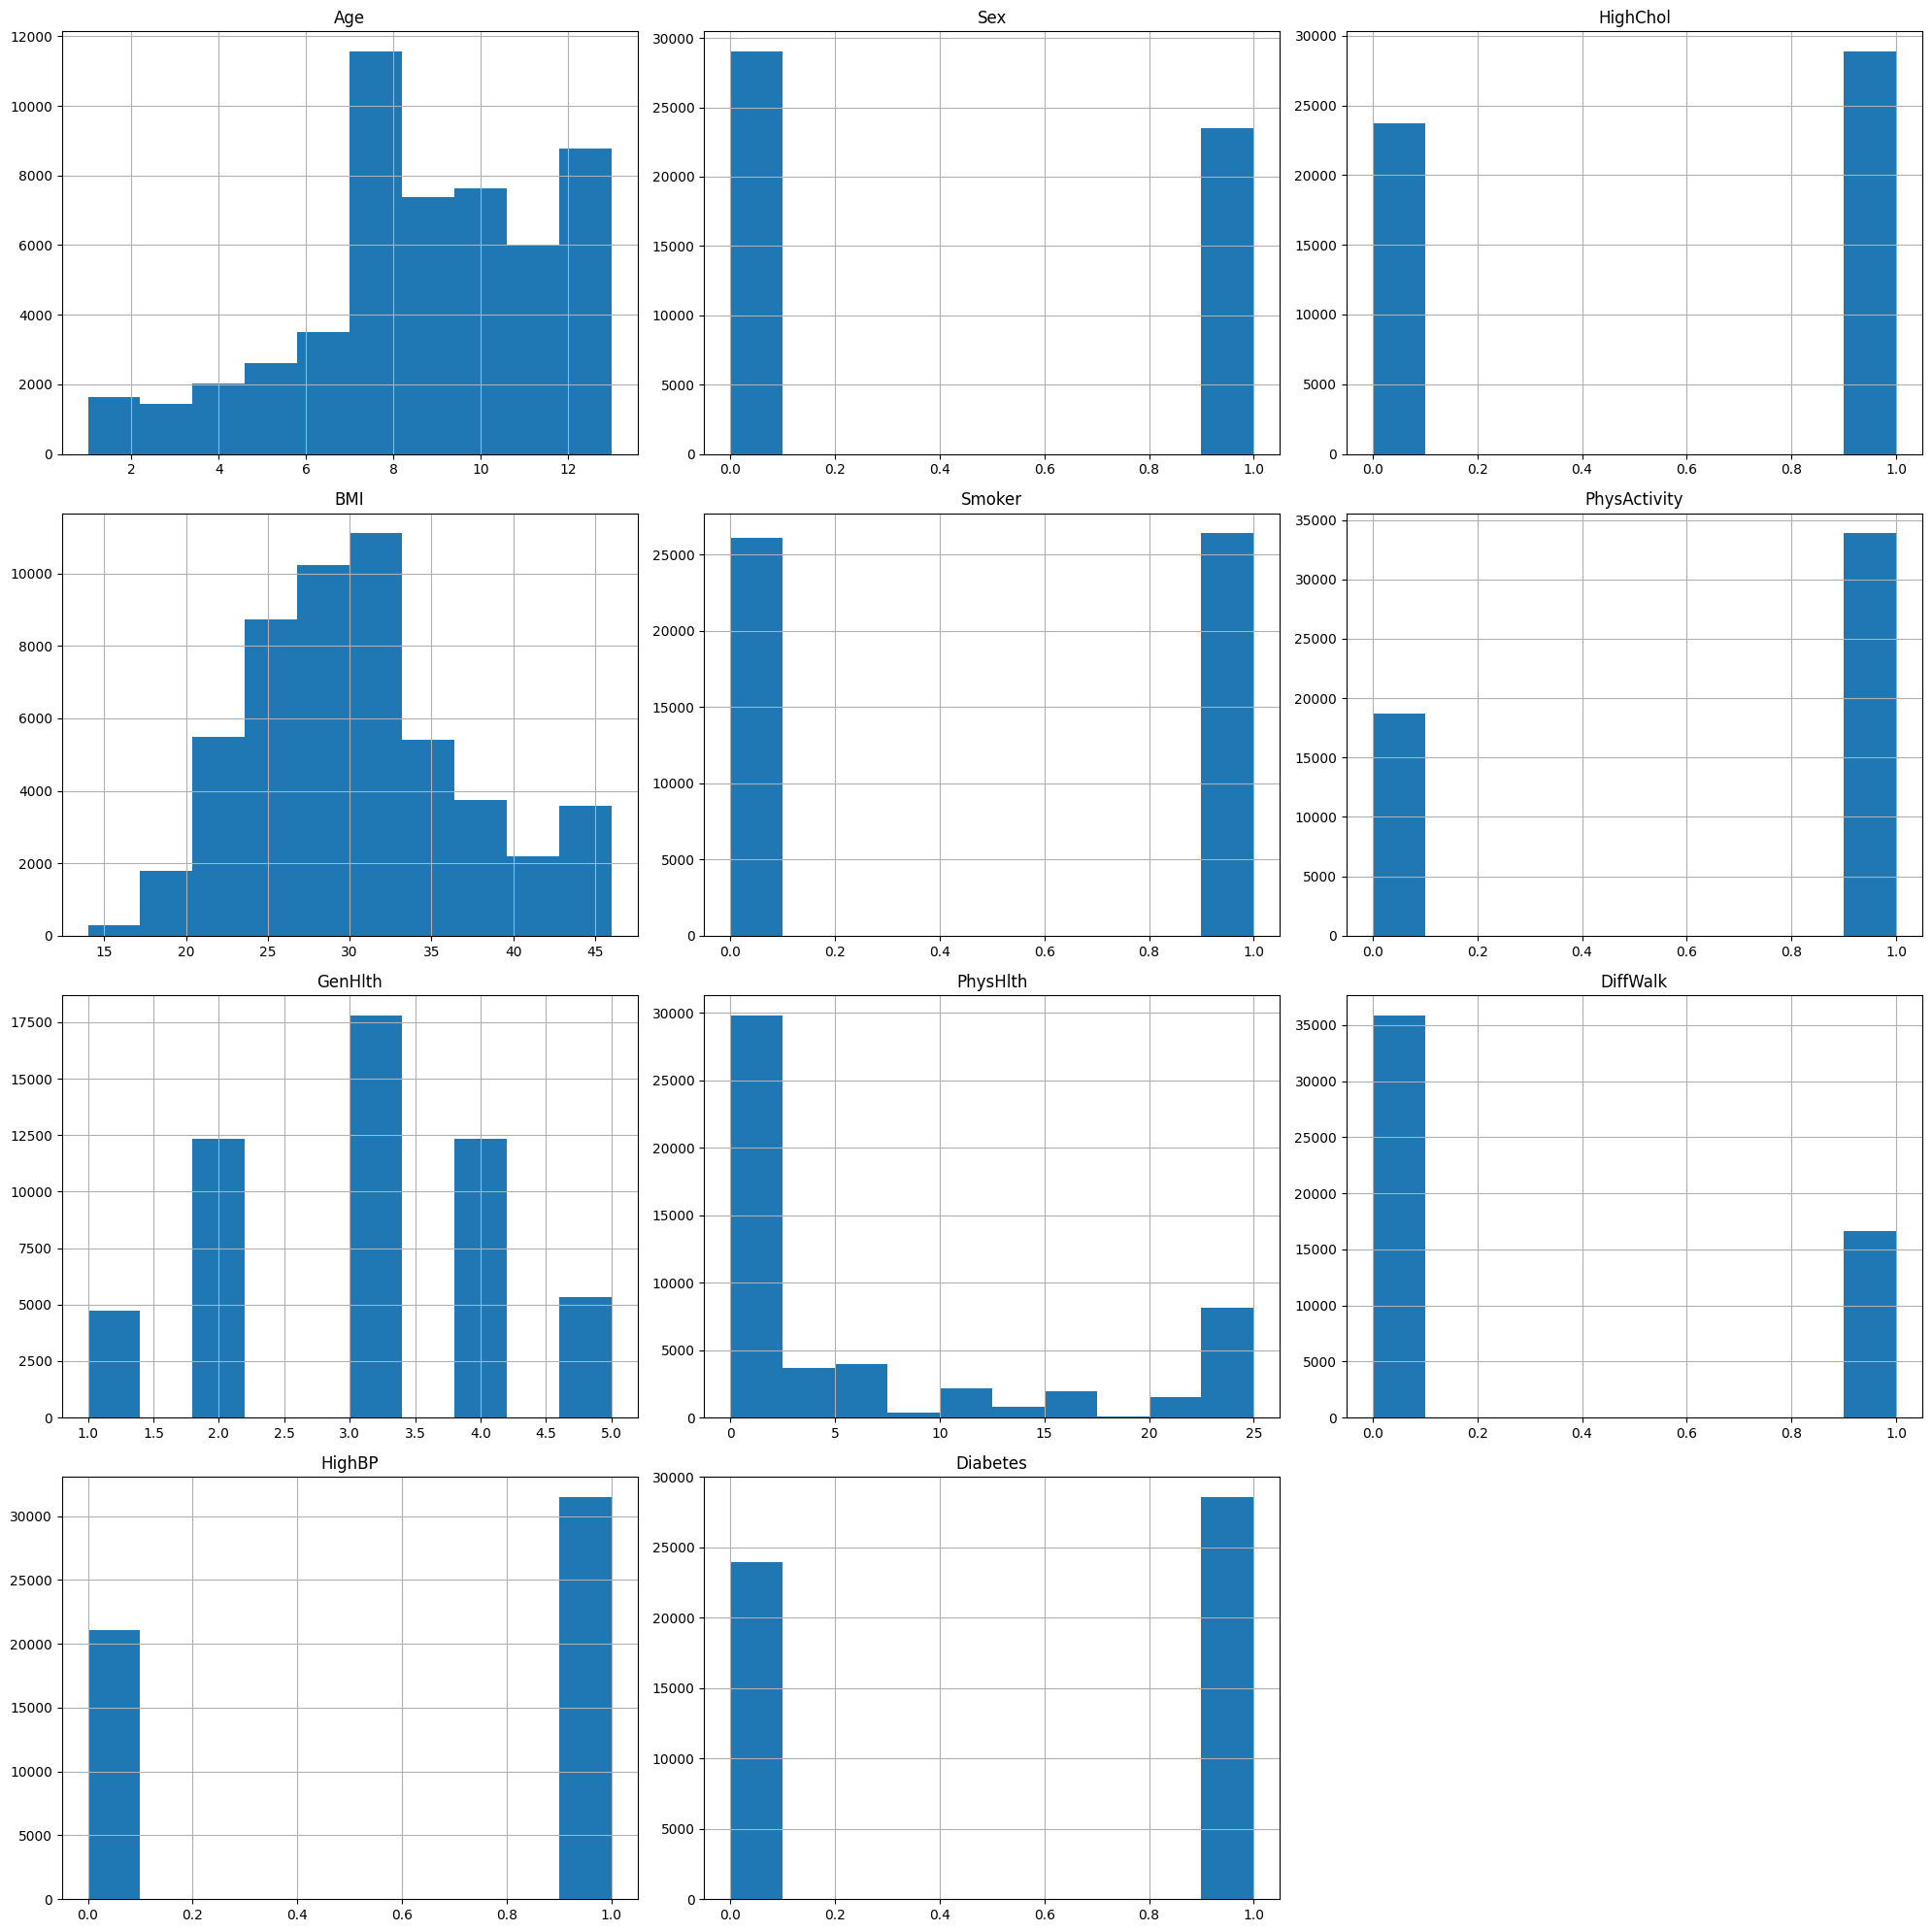

In [42]:
#Histograms 
df1.hist (figsize=(20,20))
plt.tight_layout()
plt.show()

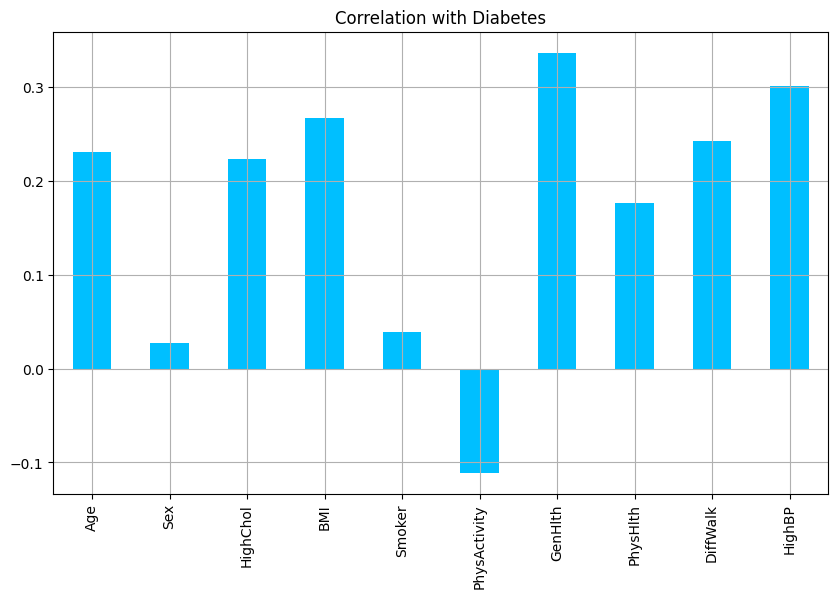

In [43]:
#check correlation of other columns with diabetes column
df1.drop('Diabetes', axis=1).corrwith(df1.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), 
title="Correlation with Diabetes",color="deepskyblue");

In [44]:
#variables with correlation less than 0.1 are Sex, Smoker, Fruits, Veggies
df1.drop(columns=['Sex','Smoker'],inplace=True)

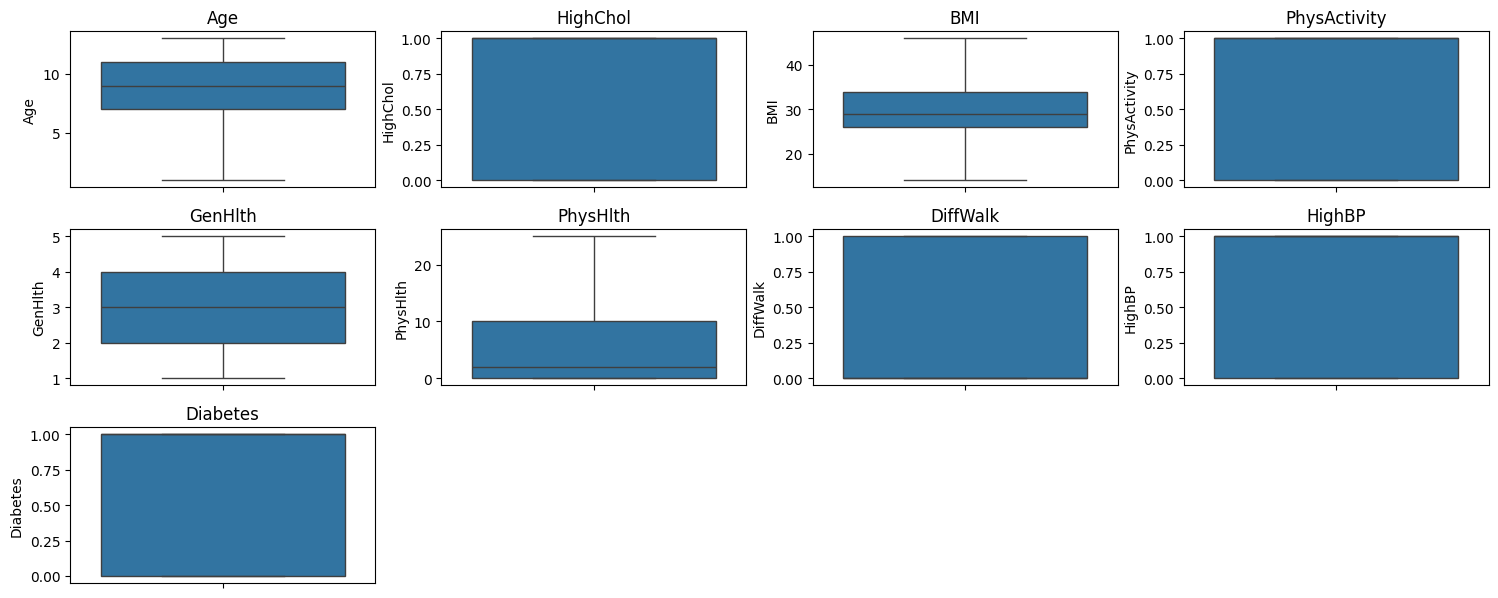

In [45]:
#box plot to after removing outliers
plt.figure(figsize=(15, 10))
numeric_columns = df1.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
 plt.subplot(5, 4, i+1)
 sns.boxplot(y=df1[col])
 plt.title(col)
plt.tight_layout()
plt.show()

<Axes: >

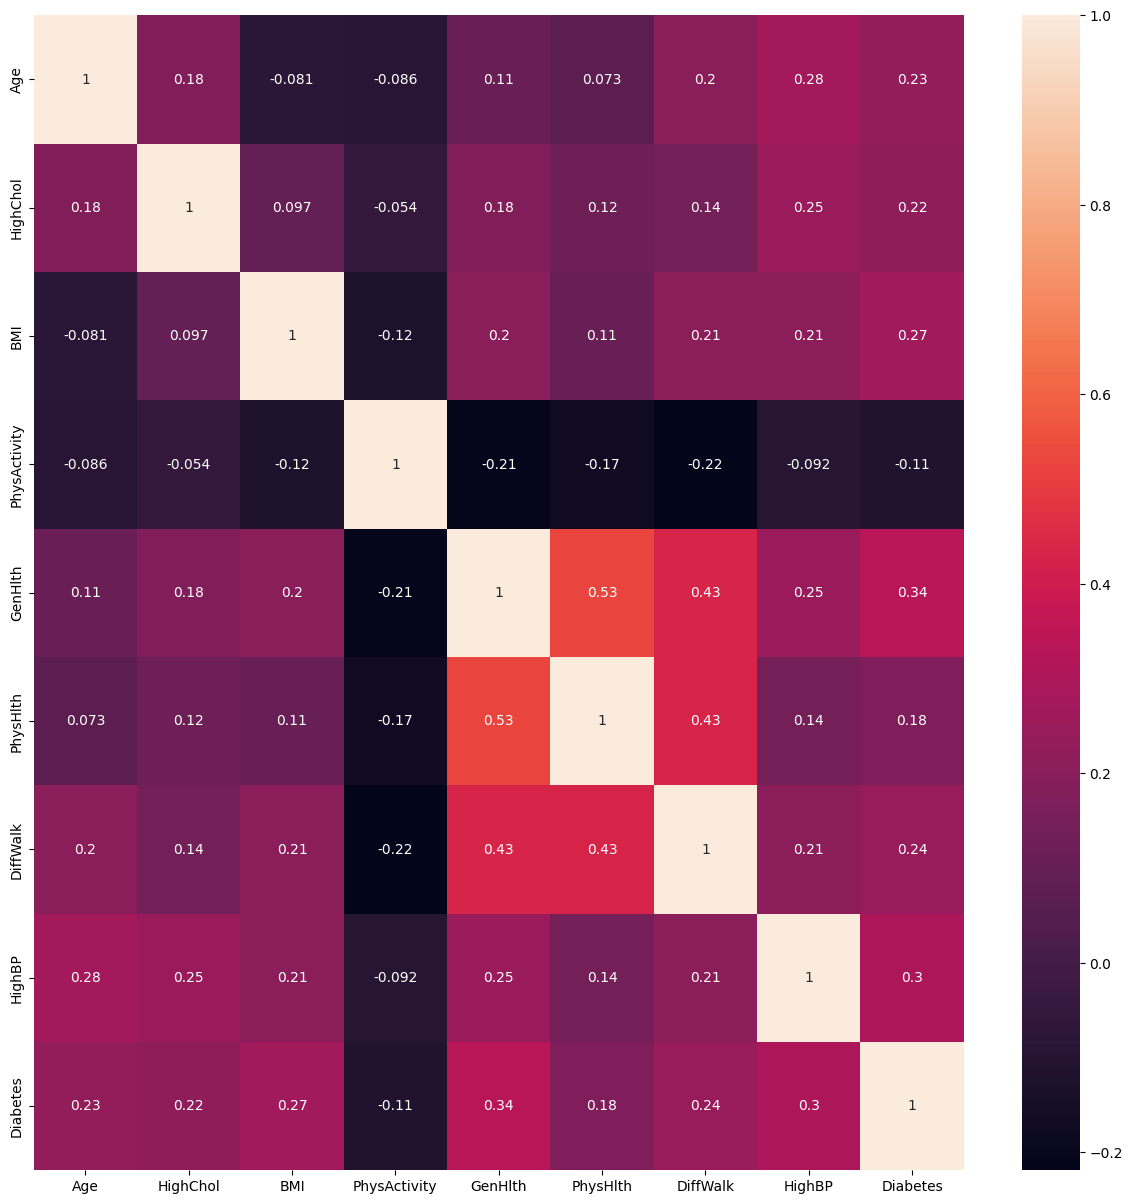

In [46]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True)

In [47]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = df1.apply(skew)
kurt = df1.apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)

# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

Age            -0.528397
HighChol       -0.197886
BMI             0.548988
PhysActivity   -0.604615
GenHlth         0.005899
PhysHlth        1.170385
DiffWalk        0.787211
HighBP         -0.406323
Diabetes       -0.177216
dtype: float64
Age             2.762492
HighChol        1.039159
BMI             2.782965
PhysActivity    1.365559
GenHlth         2.314786
PhysHlth        2.734976
DiffWalk        1.619701
HighBP          1.165098
Diabetes        1.031405
dtype: float64
Variables with positive skewness (skew > 1):
 PhysHlth    1.170385
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 Age             2.762492
HighChol        1.039159
BMI             2.782965
PhysActivity    1.365559
GenHlth         2.314786
PhysHlth        2.734976
DiffWalk        1.619701
HighBP          1.165098
Diabetes        1.031405
dtype: float64
Variables with leptokurtic distribution (kurtosis > 3):
 Series([],

In [48]:
df1.head()

,Age,HighChol,BMI,PhysActivity,GenHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4.0,0.0,26.0,1.0,3.0,25.0,0.0,1.0,0.0
1,12.0,1.0,26.0,0.0,3.0,0.0,0.0,1.0,0.0
2,13.0,0.0,26.0,1.0,1.0,10.0,0.0,0.0,0.0
3,11.0,1.0,28.0,1.0,3.0,3.0,0.0,1.0,0.0
4,8.0,0.0,29.0,1.0,2.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable
label_encoder = LabelEncoder()
df1['Diabetes'] = label_encoder.fit_transform(df1['Diabetes'])

# One hot encode the categorical features (excluding the target variable)
categorical_features = df1.select_dtypes(include=['object']).columns
df1_encoded  = pd.get_dummies(df1, columns = categorical_features, drop_first = True)

df1.head()

,Age,HighChol,BMI,PhysActivity,GenHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4.0,0.0,26.0,1.0,3.0,25.0,0.0,1.0,0
1,12.0,1.0,26.0,0.0,3.0,0.0,0.0,1.0,0
2,13.0,0.0,26.0,1.0,1.0,10.0,0.0,0.0,0
3,11.0,1.0,28.0,1.0,3.0,3.0,0.0,1.0,0
4,8.0,0.0,29.0,1.0,2.0,0.0,0.0,0.0,0


In [50]:
# split the data into features (x) and target (y)
x = df1_encoded.drop('Diabetes', axis = 1)
y = df1_encoded['Diabetes']

x.head()

,Age,HighChol,BMI,PhysActivity,GenHlth,PhysHlth,DiffWalk,HighBP
0,4.0,0.0,26.0,1.0,3.0,25.0,0.0,1.0
1,12.0,1.0,26.0,0.0,3.0,0.0,0.0,1.0
2,13.0,0.0,26.0,1.0,1.0,10.0,0.0,0.0
3,11.0,1.0,28.0,1.0,3.0,3.0,0.0,1.0
4,8.0,0.0,29.0,1.0,2.0,0.0,0.0,0.0


In [51]:
x.shape

(52548, 8)

In [52]:
# Scale the numerical features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert the result back to a DataFrame
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled

,Age,HighChol,BMI,PhysActivity,GenHlth,PhysHlth,DiffWalk,HighBP
0,-1.632415,-1.103826,-0.651199,0.742389,-0.020340,1.992512,-0.681069,0.817267
1,1.170549,0.905940,-0.651199,-1.347003,-0.020340,-0.713866,-0.681069,0.817267
2,1.520919,-1.103826,-0.651199,0.742389,-1.821255,0.368685,-0.681069,-1.223590
3,0.820178,0.905940,-0.352262,0.742389,-0.020340,-0.389101,-0.681069,0.817267
4,-0.230933,-1.103826,-0.202793,0.742389,-0.920798,-0.713866,-0.681069,-1.223590
...,...,...,...,...,...,...,...,...
52543,0.820178,0.905940,-0.501730,0.742389,0.880117,1.992512,-0.681069,-1.223590
52544,-0.931674,0.905940,0.992956,-1.347003,0.880117,-0.713866,-0.681069,-1.223590
52545,0.469808,0.905940,-0.202793,-1.347003,-0.920798,-0.713866,1.468280,-1.223590
52546,1.520919,0.905940,-0.800668,-1.347003,1.780574,-0.713866,1.468280,0.817267


In [53]:
# Splitting the dataset into 80-20 that is , 80% of the data is for training and 20% of the data is for testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dictionary to hold the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(probability=True, random_state=42)
}

# Lists to store the evaluation metrics for each model
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    model_names.append(model_name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_pred))
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("\n")

# Summarize the evaluation metrics for all models in a DataFrame
results_df1 = pd.DataFrame({
    'Model-Name': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

# Check column names to ensure they are correct
print(results_df1.columns)

Model: Logistic Regression
Accuracy: 0.7044719314938154
Precision: 0.7147049233778937
Recall: 0.7637630662020906
F1 Score: 0.7384200774802089
ROC AUC Score: 0.6984433779647768


Model: Random Forest
Accuracy: 0.6399619410085633
Precision: 0.6640389131164038
Recall: 0.6897212543554007
F1 Score: 0.6766364723978807
ROC AUC Score: 0.6349025558988743


Model: Decision Tree
Accuracy: 0.5957183634633683
Precision: 0.6458618665623166
Recall: 0.5750871080139373
F1 Score: 0.6084231868030596
ROC AUC Score: 0.5978160906945996


Model: Naive Bayes
Accuracy: 0.6883920076117983
Precision: 0.7217125382262997
Recall: 0.6989547038327526
F1 Score: 0.7101513408266218
ROC AUC Score: 0.6873180227759151


Model: SVC
Accuracy: 0.7065651760228354
Precision: 0.7063393412057178
Recall: 0.7919860627177701
F1 Score: 0.7467148488830486
ROC AUC Score: 0.6978798238117152


Index(['Model-Name', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'], dtype='object')


In [57]:
results_df1 = pd.DataFrame({"Model-Name":model_names, "Accuracy": accuracies, "Precision":precisions, "Recall":recalls, "F1 Score ":f1_scores,'ROC AUC':roc_aucs})
results_df1 = results_df1.set_index('Model-Name')
results_df1.sort_values("Accuracy", ascending = False)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model-Name,,,,,
SVC,0.706565,0.706339,0.791986,0.746715,0.697880
Logistic Regression,0.704472,0.714705,0.763763,0.738420,0.698443
Naive Bayes,0.688392,0.721713,0.698955,0.710151,0.687318
Random Forest,0.639962,0.664039,0.689721,0.676636,0.634903
Decision Tree,0.595718,0.645862,0.575087,0.608423,0.597816


1.Recursive Feature Elimination(RFE)

In [63]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Define the model
model = SVC()

# Create the RFE model and select the top 8 features
rfe = RFE(model, n_features_to_select = 8)
fit = rfe.fit(x,y)

# Get the selected features
selected_features = x.columns[fit.support_]

print('Selected Features:', selected_features)

Selected Features: Index(['Age', 'HighChol', 'BMI', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'DiffWalk', 'HighBP'],
      dtype='object')


2.SelectKBest with Chi-Sqaured Test

This method can be used for classification tasks and selects the top k features that have the highest chi-squared statistics with respect to the target variable.

In [66]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(x, y)

# Get the scores and feature names
df1scores = pd.DataFrame(fit.scores_, columns=["Score"])
df1columns = pd.DataFrame(x.columns, columns=["Feature"])

# Concat two dataframes for better visualization
feature_scores = pd.concat([df1columns, df1scores], axis=1)

# Print the best features
print(feature_scores.nlargest(10, 'Score'))

        Feature         Score
5      PhysHlth  21088.611834
2           BMI   5526.534109
0           Age   2633.924017
4       GenHlth   2429.765913
6      DiffWalk   2119.386736
7        HighBP   1904.738183
1      HighChol   1178.656936
3  PhysActivity    229.435808


2.Feature Importance

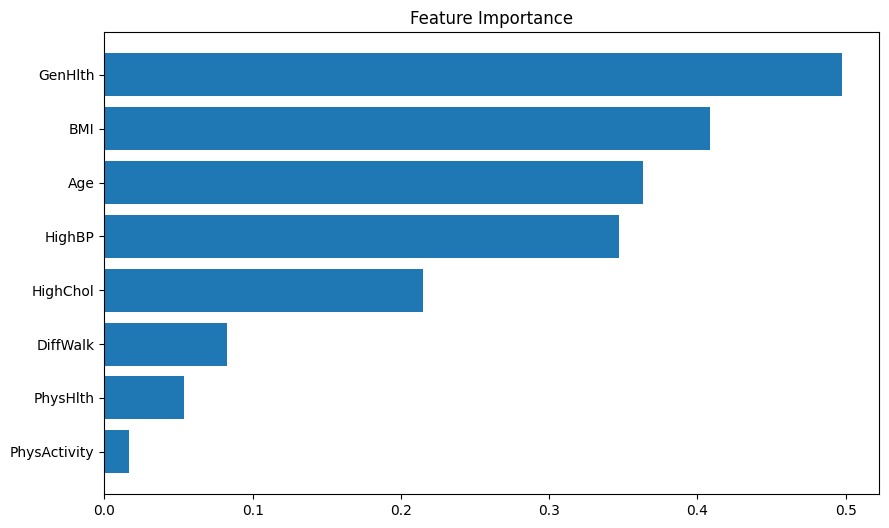

In [56]:
from sklearn.svm import SVC

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Fit the SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_scaled, y)

# Get the absolute values of the coefficients to represent feature importance
importances = np.abs(svm.coef_[0])
feature_names = x.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.show()


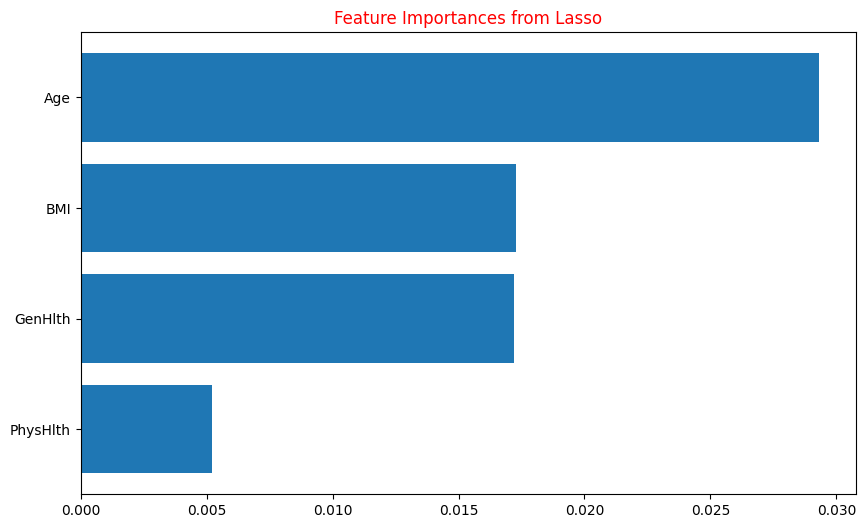

In [70]:
from sklearn.linear_model import Lasso

# Fit the model
lasso = Lasso(alpha = 0.1)
lasso.fit(x,y)

# Get the coefficients
coefs = lasso.coef_

# Create a DataFrame for better visualization
feature_coefs = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefs})
feature_coefs = feature_coefs[feature_coefs['Coefficient'] !=0]
feature_coefs = feature_coefs.sort_values(by = 'Coefficient', ascending = False)

# Plot feature importances
plt.figure(figsize = (10,6))
plt.title('Feature Importances from Lasso',color='red')
plt.barh(feature_coefs['Feature'], feature_coefs['Coefficient'])
plt.gca().invert_yaxis()
plt.show()

Model: Logistic Regression
Accuracy: 0.7043767840152236
Precision: 0.7145884270578647
Recall: 0.7637630662020906
F1 Score: 0.7383578947368421
ROC AUC Score: 0.769557703124201


Model: Random Forest
Accuracy: 0.6396764985727879
Precision: 0.6638697768081893
Recall: 0.689198606271777
F1 Score: 0.6762971194119155
ROC AUC Score: 0.6874216210490945


Model: Decision Tree
Accuracy: 0.5961941008563273
Precision: 0.64609375
Recall: 0.5763066202090592
F1 Score: 0.609208103130755
ROC AUC Score: 0.6224086552860137


Model: Naive Bayes
Accuracy: 0.6883920076117983
Precision: 0.7217125382262997
Recall: 0.6989547038327526
F1 Score: 0.7101513408266218
ROC AUC Score: 0.7513076428607952


Model: SVC
Accuracy: 0.7095147478591818
Precision: 0.7063431116571955
Recall: 0.801219512195122
F1 Score: 0.7507958533997224
ROC AUC Score: 0.7697461997531028




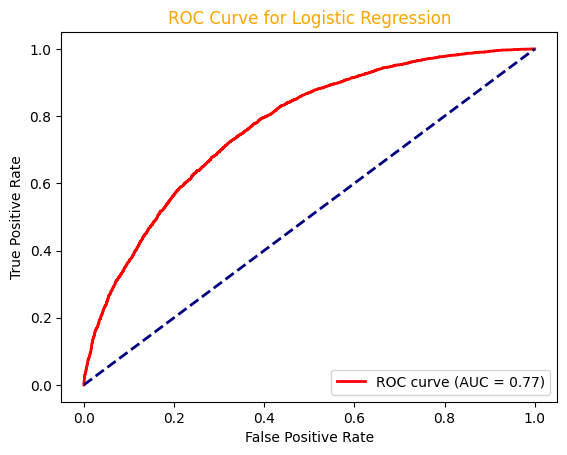

ROC curve for Logistic Regression plotted successfully.


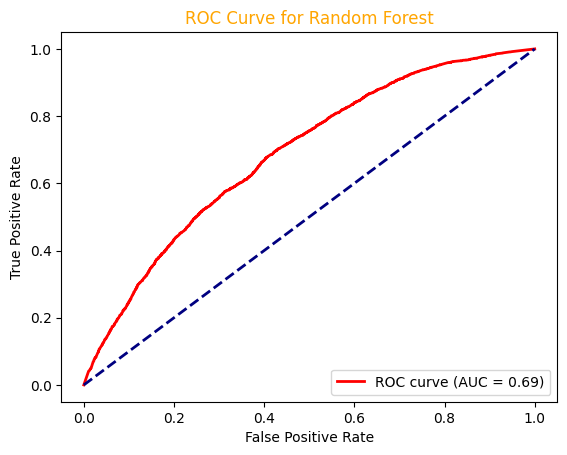

ROC curve for Random Forest plotted successfully.


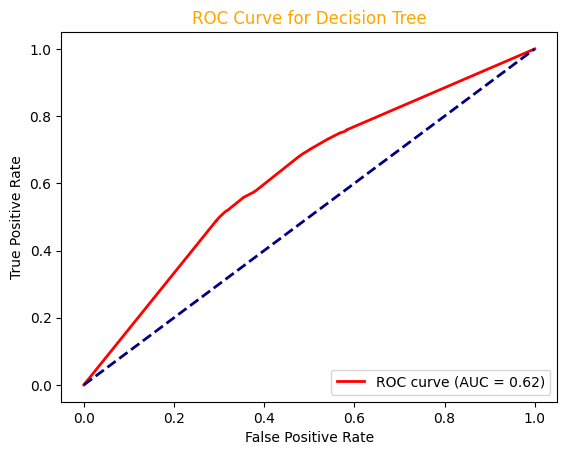

ROC curve for Decision Tree plotted successfully.


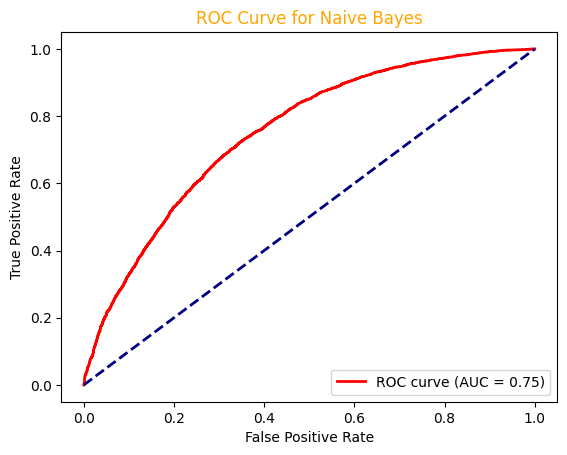

ROC curve for Naive Bayes plotted successfully.


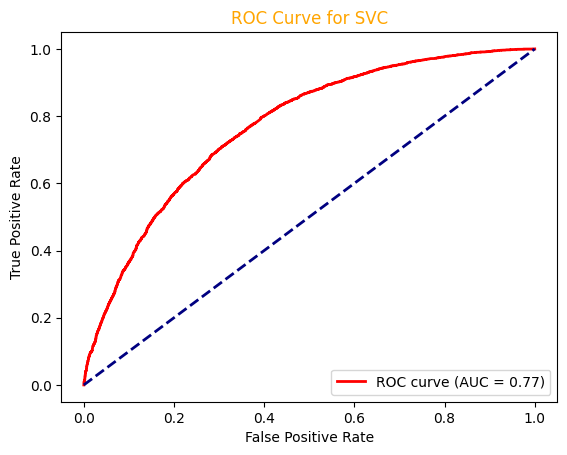

ROC curve for SVC plotted successfully.


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Assuming 'x' and 'df1' are your dataframes
selected_features = ['Age', 'HighChol', 'BMI', 'PhysActivity', 'GenHlth', 'PhysHlth',
       'DiffWalk', 'HighBP']

X = x[selected_features]
y = df1['Diabetes']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to be trained
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVC': SVC(probability=True, random_state=42),
}

# Training and evaluation
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    if y_pred_prob is not None:
        print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
    print("\n")

# Plotting ROC curves for each model
for model_name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        
        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}',color = 'orange')
        plt.legend(loc="lower right")
        plt.show()
        print(f"ROC curve for {model_name} plotted successfully.")
    else:
        print(f"{model_name} does not support predict_proba for ROC curve")